# KMEANS
Ciencia De Datos
Jhon Edison Muñoz Burgos - A01793659

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [ ]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [ ]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [ ]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

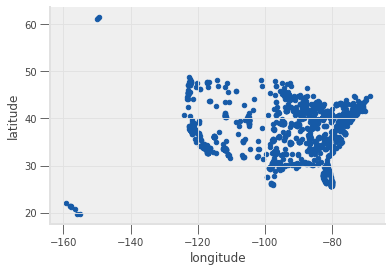

In [ ]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [ ]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [ ]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [ ]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

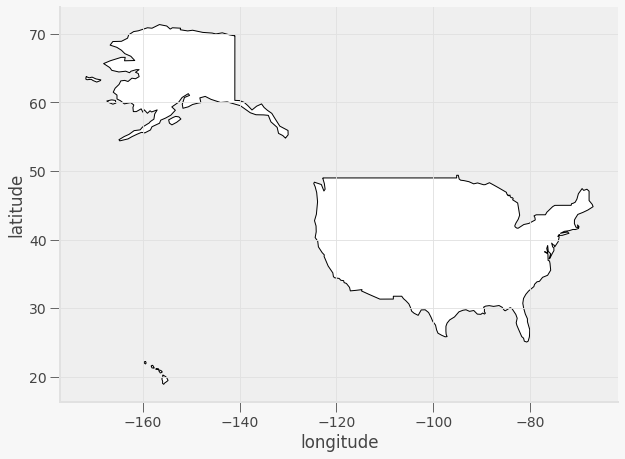

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

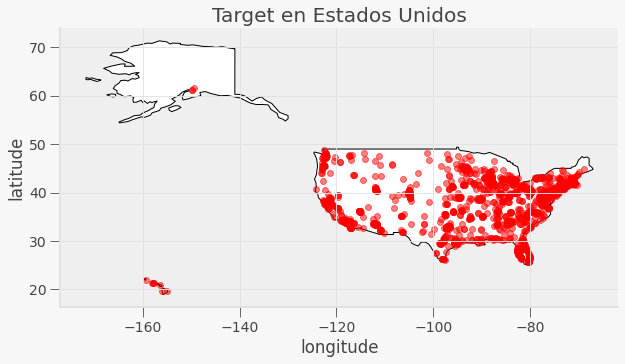

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [ ]:
#Importamos las librerias que vamos a Utilizar
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from pandas.core.internals.concat import concat_arrays
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

In [ ]:
#Probemos con valores aproximados sacados de la grafica para Cluster. Para este ejemplo probaremos con 10 Conjuntos. Para este ejemplo seran los grupos de ubicacion que representan las tiendas
K_Aux = range(1,10)

#Se almacenaran los errores de los cluster en la sigueinte variable
Errores = []

for k in K_Aux:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    
#Entrenamos el Modelo kmeans

    kmeans = kmeans.fit(latlong)

#Almacenamos la Distorcion para ver el momento que empieza a disminuir la forma lineal
    Errores_Cluster = kmeans.inertia_
    Errores.append(Errores_Cluster)


    
centers = pd.DataFrame({'Clusters': K_Aux, 'Errores': Errores})
centers

,Clusters,Errores
0,1,527995.443069
1,2,171146.625996
2,3,104757.409018
3,4,83027.513457
4,5,62084.981230
5,6,47006.097446
6,7,38624.360196
7,8,31577.512530
8,9,25437.866687


Utilizaremos el metodo Codo para encontrar el valor optimo de K

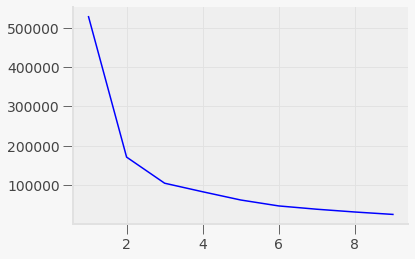

In [ ]:
import seaborn as sns

#Graficamos cada clústeres con sus sumas cuadráticas
plt.plot(centers.Clusters, centers.Errores, 'blue', markersize = 3)

Para determinar el número óptimo de grupos, tenemos que seleccionar el valor de k en el "codo", es decir, el punto después del cual la distorsión/inercia comienza a disminuir de forma lineal. Por lo tanto, para los datos dados, concluimos que el número óptimo de conglomerados para los datos es 3 . 

*Metodo de las Siluetas*

In [ ]:
#Para el metodo de siluetas vamos a realizar un arreglo y empezamos apartir de 2. Cluster o grupos que serian los minimos a utilizar.
for i in range(2,15):

#Es necesario entrenar el modelo con el objetivo de ver los resultados por cluster y saber cual tiene el valor mas alto

    labels=KMeans(n_clusters=i,init="k-means++").fit(latlong).labels_
  
    print ("Resultado Cluster) = "+str(i)+" is "
           +str(
               metrics.silhouette_score(
                   latlong,labels,
                   metric="euclidean",
                   sample_size=100))) 
 

Resultado Cluster) = 2 is 0.5947534607646593
Resultado Cluster) = 3 is 0.46265211575319776
Resultado Cluster) = 4 is 0.3888158220102574
Resultado Cluster) = 5 is 0.5531803177310861
Resultado Cluster) = 6 is 0.5120287330075574
Resultado Cluster) = 7 is 0.5240815511185531
Resultado Cluster) = 8 is 0.5466242966994131
Resultado Cluster) = 9 is 0.5794954809889876
Resultado Cluster) = 10 is 0.5702729422999044
Resultado Cluster) = 11 is 0.48515645233378485
Resultado Cluster) = 12 is 0.5544411640009698
Resultado Cluster) = 13 is 0.5605533493396172
Resultado Cluster) = 14 is 0.5428088725667239


Por el metodo de silueta y por los resultados se puede definir que el grupo se puede establecer dos tiendas o cluster para colocar los almacenes y cumplir con el obetivo de Target sobre la optimizacion de gasolina, tiempos de entrega y cumplimiento de los clientes.

Para este ejercicio vamos a basarnos en la teoria de Codo teniendo como cluster idoneo 3

In [ ]:
#Entrenamos el modelo con los  3 cluster que vamos a definir como los optimos.

kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans = kmeans.fit(latlong)
kmeans.cluster_centers_

array([[  37.789554  ,  -78.56990807],
       [  37.48734203, -118.62447332],
       [  37.98006261,  -93.3271723 ]])

In [ ]:
X = df[["longitude","latitude"]]

Distorcion = KMeans(n_clusters=3).fit(X) 
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(X)
clusters = np.unique(kmeans.labels_)

#Obtenemos los centros 
centros = kmeans.cluster_centers_

DF_Coordenadas = pd.DataFrame(centros)
DF_Coordenadas["Coordenadas"] = list(zip(DF_Coordenadas[0], DF_Coordenadas[1])) 
DF_Coordenadas["Coordenadas"] = DF_Coordenadas["Coordenadas"].apply(Point) 


Geog = gpd.GeoDataFrame(DF_Coordenadas, geometry="Coordenadas") 
Geog

,0,1,Coordenadas
0,-78.569908,37.789554,POINT (-78.56991 37.78955)
1,-93.327172,37.980063,POINT (-93.32717 37.98006)
2,-118.624473,37.487342,POINT (-118.62447 37.48734)


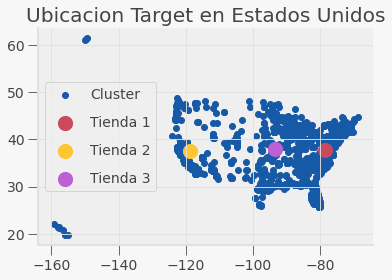

In [ ]:
clusters = np.unique(kmeans.labels_)
labels = ["Cluster","Tienda 1", "Tienda 2", "Tienda 3"]

#Mapa de las tiendas
plt.scatter(latlong.longitude, latlong.latitude)

for i,v in enumerate(clusters):
   
    plt.scatter(centers[i][1], centers[i][0], label = i, s=200)


plt.legend(loc = 'center left', labelspacing = 1,labels = labels)
plt.title("Ubicacion Target en Estados Unidos")
plt.show()

Se puede observar en la grafica la ubicacion de las 3 tiendas con las siguientes coordenadas, Tienda 1  (-78.589908 / 37.78) , Tienda 3 (-93.32 / 37.98), Tienda 2 (-118.62 - 37.48), con la ubicacion de estas tiendas cubririamos la mayor parte de clientes.

Cantidad de tiendas que va a surtir cada Cluster de Target.

In [ ]:
latlong['Distorcion'] = kmeans.labels_
latlong.loc[:, 'Distorcion'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    826
2    628
1    385
Name: Distorcion, dtype: int64

La tienda 0 va a surtir 826, la tienda 1 385 y la tienda 2 628.

In [ ]:
Localizacion1 = str(DF_Coordenadas[1][0]) + ", " + str(DF_Coordenadas[0][0]) 
print(Localizacion1," Tienda 1")
Localizacion2 = str(DF_Coordenadas[1][1]) + ", " + str(DF_Coordenadas[0][1])
print(Localizacion2, "  Tienda 3")
Localizacion3 = str(DF_Coordenadas[1][2]) + ", " + str(DF_Coordenadas[0][2])
print(Localizacion3, " Tienda 2" )


37.789554004474006, -78.56990807484885  Tienda 1
37.98006260590112, -93.32717230430622   Tienda 3
37.48734203064935, -118.62447331844157  Tienda 2


In [ ]:
# Con las coordenadas obtendias por los almacenes buscamos por medio de la libreria  la ubicacion de las tiendas.

geolocator = Nominatim(user_agent="my-application")
Localizaciones = [Localizacion1, Localizacion2, Localizacion3] 

for i in Localizaciones:
  location = geolocator.reverse(i) 
  print('ubicacion de la tienda ---', location.address)

ubicacion de la tienda --- Langhorne Road, Totier Hills, Albemarle County, Virginia, 22946, United States
ubicacion de la tienda --- Hickory County, Missouri, United States
ubicacion de la tienda --- Paradise Estates, Mono County, California, United States


In [ ]:
#Obtenemos la distancia promedio entre los almacenes
np.sqrt(kmeans.inertia_)

323.66249244869977

***Conclusiones***

*Teniendo en cuenta que el departamento de logistica de la empresa Target requiere ubicar sus almacenes en unos puntos estrategicos los cuales nos ayuden a optimizar el costo de gasolina, tiempos de entrega y disminuir costos, se obtuvo los datos de los almacenes en Estados Unidos, Para determinar cuantos almacenes estrategicos cubririan la mayoria de los mismos sin tener en cuenta los outliner, se determino usar el metodo de codo, el cual nos arrojo 3 almacenes como optimos para cumplir el objetivo. Este metodo nos indica que el punto cuando se observa la  diminusion de forma lineal seria nuestro k. o el numero indicado de cluster.

La Ubicacion de las tiendas seran las siguintes

*  ** Tienda 1:**   37.789554004474006, -78.56990807484885 , Langhorne Road, Totier Hills, Albemarle County, Virginia, 22946, United States

* ** Tienda 2: **    37.48734203064935, -118.62447331844157, Paradise Estates, Mono County, California, United States

* ** Tienda 3**      37.98006260590112, -93.32717230430622, Hickory County, Missouri, United States
    

* Se observa que la tienda 1 estaria cubriendo un total de 826 almacenes, la tienda 2 385 lmacenes y la tienda 3 628 almacenes, es necesario consultar con targe las capacidades de estas tiendas, disponibilidad de las personas, recursos de transporte etc.


